## **Importación de Librerias Necesarias**

In [60]:
import pandas as pd
import os
import requests
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

## **Carga y lectura de los datos**

In [61]:
# Cargar y mostrar los datos
df = pd.read_csv("data/Diabetes/Diabetes.csv", encoding="utf8")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## **Entendimiento  y Visualización de los datos**

In [62]:
# Reemplaza los signos de interrogación (?) en el DataFrame por valores nulos (NaN)
df = df.replace("?", np.nan)

# Cuenta cuántas columnas del DataFrame son de tipo 'object' (por ejemplo, texto o cadenas de caracteres)
len(df.select_dtypes('O').columns)

37

In [63]:
# Genera estadísticas descriptivas para las columnas numéricas del DataFrame.
# Incluye métricas como: count, mean, std, min, 25%, 50%, 75% y max.
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [64]:
# Muestra información general del DataFrame:
# número total de filas, número de columnas, nombres de columnas,
# cantidad de valores no nulos por columna, tipo de dato de cada columna,
# y uso total de memoria del DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [65]:
# Calcula el porcentaje de valores nulos por columna (solo si hay más de un nulo en esa columna).
df.isnull().sum()[df.isnull().sum() > 1] / len(df) * 100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
max_glu_serum        94.746772
A1Cresult            83.277322
dtype: float64

In [66]:
# Elimina las columnas 'weight', 'payer_code' y 'medical_specialty' del DataFrame.
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

In [67]:
# Muestra los valores únicos presentes en la columna 'readmitted'.
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\1823995314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


readmitted
0    90409
1    11357
Name: count, dtype: int64


C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\1823995314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="readmitted", data=df, palette="Set2")


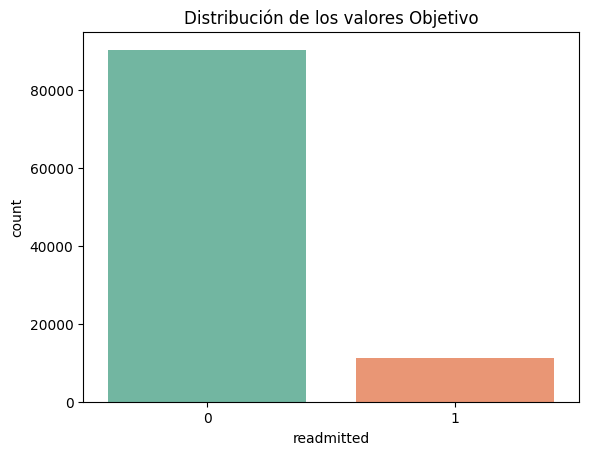

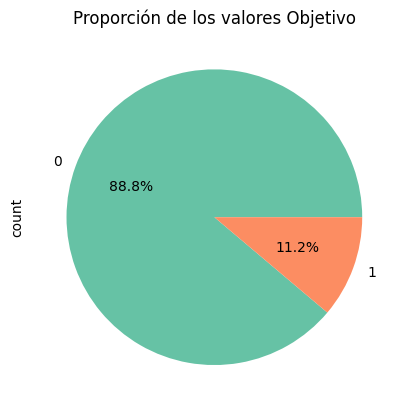

In [68]:
# Reemplazar los valores específicos en la columna 'readmitted'
df = df.replace({
    "NO": 0,     # Cambia "NO" por 0
    "<30": 1,    # Cambia "<30" por 1
    ">30": 0     # Cambia ">30" por 0
})

# Imprimir la cantidad de veces que aparece cada valor en la columna 'readmitted'
print(df.readmitted.value_counts())

# Graficar la distribución de los valores de la columna 'readmitted' con un gráfico de barras
sns.countplot(x="readmitted", data=df, palette="Set2") 
plt.title("Distribución de los valores Objetivo") 
plt.show()  # Mostrar el gráfico

# Graficar la proporción de los valores de la columna 'readmitted' con un gráfico de pastel
df.readmitted.value_counts().plot.pie(autopct="%.1f%%", colors=sns.color_palette("Set2", 2))  
plt.title("Proporción de los valores Objetivo") 
plt.show()  # Mostrar el gráfico


Proporción de razas
race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: proportion, dtype: float64


C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\1987502739.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.race, data=df, palette="Set2")


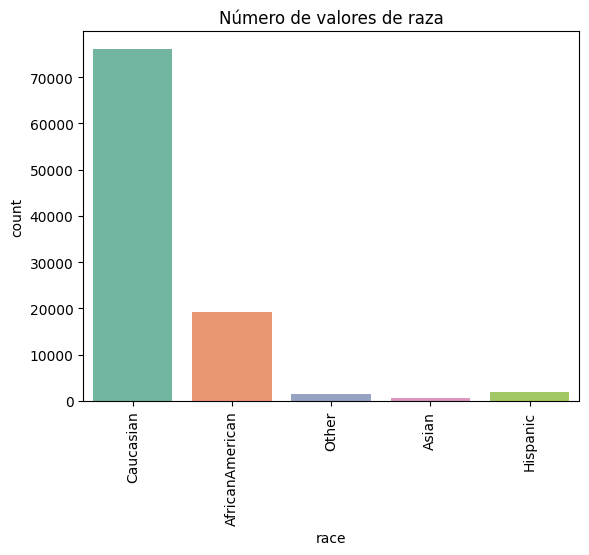

In [69]:
# Imprimir la proporción de cada valor en la columna 'race' y muestra la proporción de cada valor en la columna 'race' en porcentaje
print("Proporción de razas") 
print(df.race.value_counts(normalize=True) * 100)  

# Graficar la distribución de los valores de la columna 'race' con un gráfico de barras
sns.countplot(x=df.race, data=df, palette="Set2") 
plt.xticks(rotation=90) 
plt.title("Número de valores de raza")  
plt.show() 


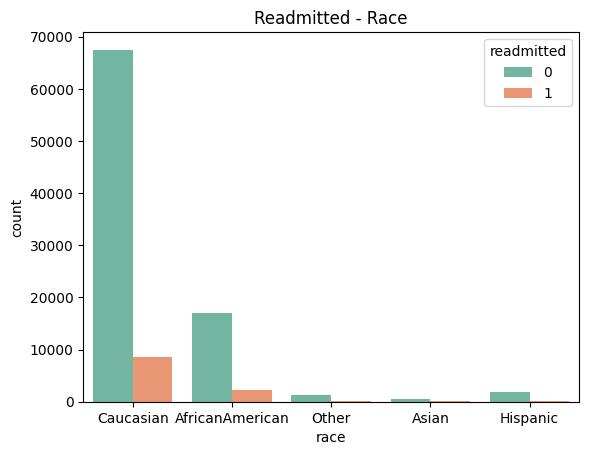

In [70]:
# Graficar la distribución de la columna 'race' con un gráfico de barras, diferenciando por 'readmitted' usando 'hue'
sns.countplot(x="race", hue="readmitted", data=df, palette="Set2") 
plt.title("Readmitted - Race")  
plt.show()

C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\3104113804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="race", y="readmitted", data=df, kind="bar", height=6, palette="Set2")


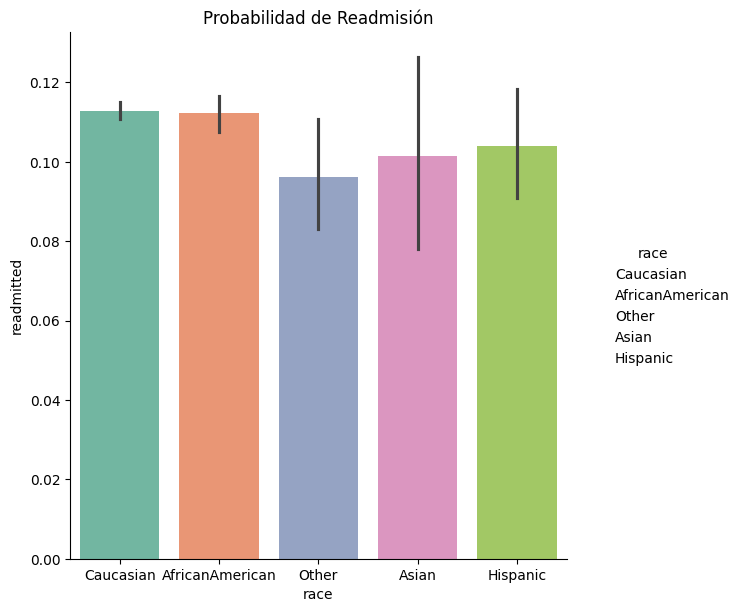

In [71]:
# Graficar la relación entre 'race' y 'readmitted' usando un gráfico de barras con 'sns.catplot'
sns.catplot(x="race", y="readmitted", data=df, kind="bar", height=6, palette="Set2")  
plt.title("Probabilidad de Readmisión") 
plt.show() 


Proporciones de los valores de género
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64


C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\2576426132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="Set2")


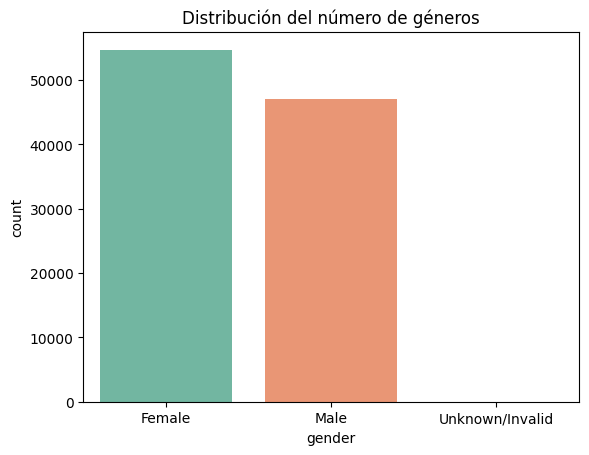

In [72]:
# Imprimir proporciones de los valores en 'gender'
print("Proporciones de los valores de género")
print(df.gender.value_counts(normalize=True))

# Graficar la distribución de 'gender' con barras y colores 'Set2'
sns.countplot(x="gender", data=df, palette="Set2")
plt.title("Distribución del número de géneros")
plt.show()

C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\3492546724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="Set2")


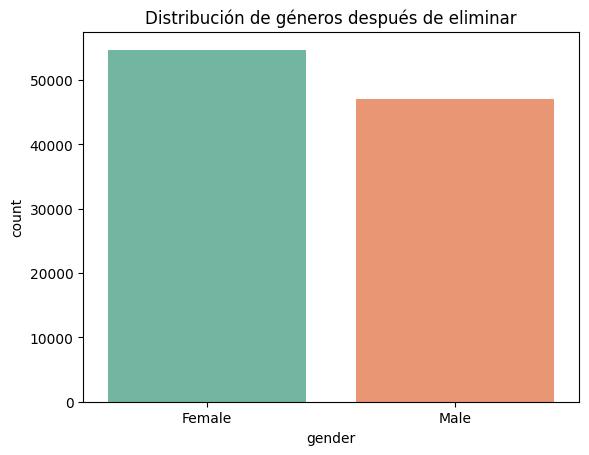

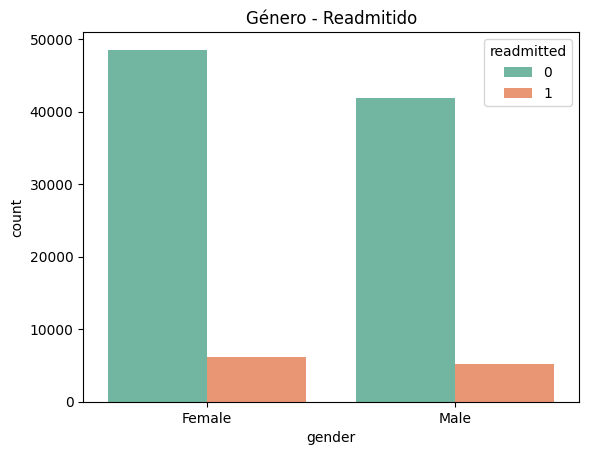

In [73]:
# Eliminar las filas donde el valor de 'gender' es 'Unknown/Invalid'
df = df.drop(df.loc[df["gender"] == "Unknown/Invalid"].index, axis=0)

# Graficar la distribución de 'gender' después de eliminar las filas
sns.countplot(x="gender", data=df, palette="Set2")
plt.title("Distribución de géneros después de eliminar")
plt.show()

# Graficar la distribución de 'gender' diferenciada por 'readmitted'
sns.countplot(x="gender", hue="readmitted", data=df, palette="Set2")
plt.title("Género - Readmitido")
plt.show()

C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\2061350289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age", data=df, palette="Set2")


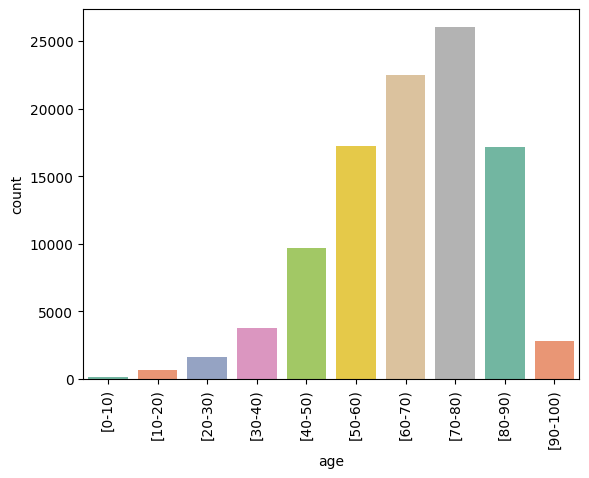

In [74]:
# Graficar la distribución de los valores de 'age' con barras
sns.countplot(x="age", data=df, palette="Set2")
plt.xticks(rotation=90) 
plt.show()  

C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\67134165.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.age = df.age.replace(age_map)
C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\67134165.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age", data=df, palette="Set2")


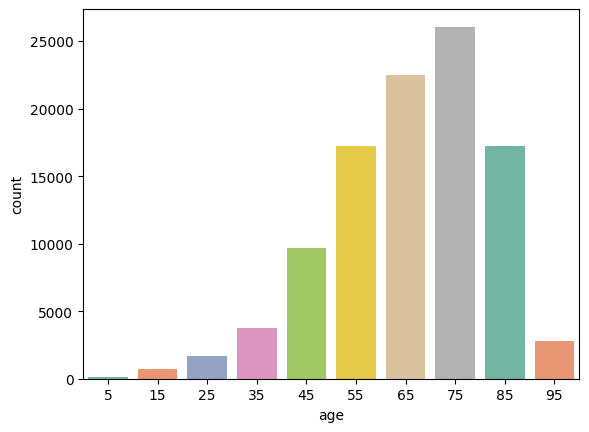

In [75]:
# Reemplazar los rangos de edades por valores representativos
age_map = {"[70-80)": 75, "[60-70)": 65, "[50-60)": 55, "[80-90)": 85, 
           "[40-50)": 45, "[30-40)": 35, "[90-100)": 95, "[20-30)": 25, 
           "[10-20)": 15, "[0-10)": 5}
df.age = df.age.replace(age_map)

# Graficar la distribución de las edades
sns.countplot(x="age", data=df, palette="Set2")
plt.show()

Distribución de ID's
admission_type_id
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64


C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\2159521165.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="admission_type_id", data=df, palette="Set2")


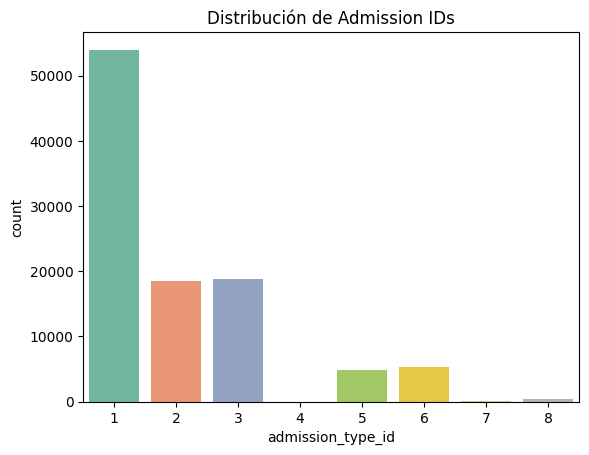

In [76]:
# Imprimir la distribución de los valores de 'admission_type_id'
print("Distribución de ID's")
print(df.admission_type_id.value_counts())

# Graficar la distribución de 'admission_type_id'
sns.countplot(x="admission_type_id", data=df, palette="Set2")
plt.title("Distribución de Admission IDs")
plt.show()


-Distribución de ID's-
admission_type_id
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: count, dtype: int64


C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\833270340.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="admission_type_id", data=df, palette="Set2")


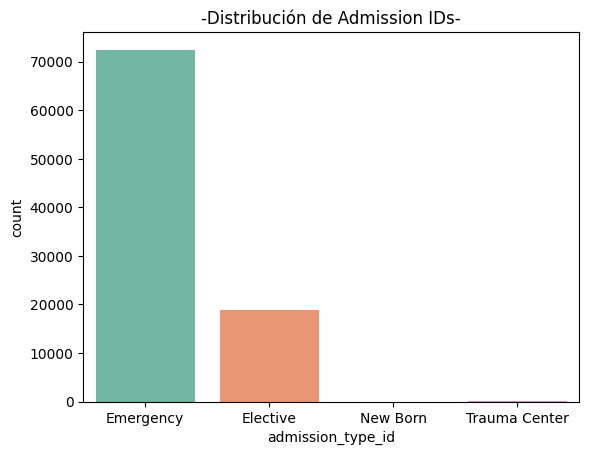

In [77]:
# Reemplazar los valores en 'admission_type_id' según el diccionario 'mapped'
mapped = {1.0: "Emergency", 2.0: "Emergency", 3.0: "Elective", 4.0: "New Born", 
          5.0: np.nan, 6.0: np.nan, 7.0: "Trauma Center", 8.0: np.nan}
df.admission_type_id = df.admission_type_id.replace(mapped)

# Imprimir la distribución de 'admission_type_id'
print("-Distribución de ID's-")
print(df.admission_type_id.value_counts())

# Graficar la distribución de 'admission_type_id'
sns.countplot(x="admission_type_id", data=df, palette="Set2")
plt.title("-Distribución de Admission IDs-")
plt.show()

Proporciones de ID's
discharge_disposition_id
Discharged to Home    73649
Other                 23434
Name: count, dtype: int64


C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\1636524073.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="discharge_disposition_id", data=df, palette="Set2")


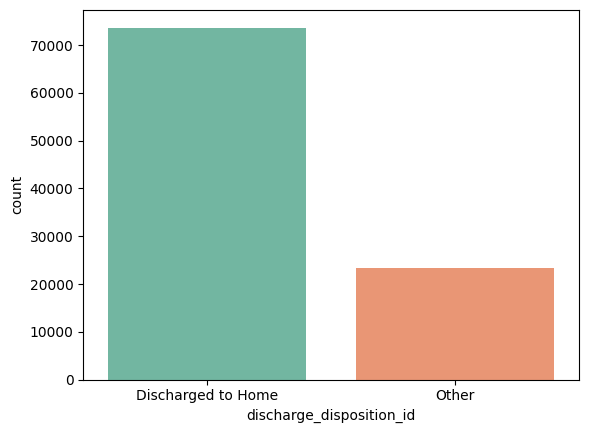

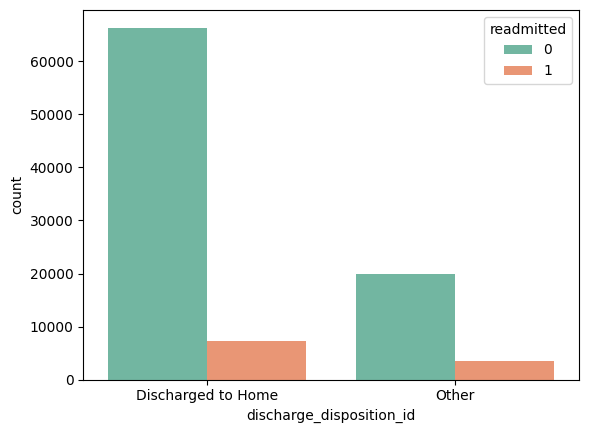

In [78]:
# Reemplazar los valores en 'discharge_disposition_id' según el diccionario 'mapped_discharge'
mapped_discharge = {
    1: "Discharged to Home", 6: "Discharged to Home", 8: "Discharged to Home", 13: "Discharged to Home", 
    19: "Discharged to Home", 18: np.nan, 25: np.nan, 26: np.nan, 2: "Other", 3: "Other", 4: "Other", 
    5: "Other", 7: "Other", 9: "Other", 10: "Other", 11: "Other", 12: "Other", 14: "Other", 15: "Other", 
    16: "Other", 17: "Other", 20: "Other", 21: "Other", 22: "Other", 23: "Other", 24: "Other", 27: "Other", 
    28: "Other", 29: "Other", 30: "Other"
}
df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

# Imprimir la distribución de 'discharge_disposition_id'
print("Proporciones de ID's")
print(df.discharge_disposition_id.value_counts())

# Graficar la distribución de 'discharge_disposition_id'
sns.countplot(x="discharge_disposition_id", data=df, palette="Set2")
plt.show()

# Graficar la distribución de 'discharge_disposition_id' diferenciada por 'readmitted'
sns.countplot(x="discharge_disposition_id", hue="readmitted", data=df, palette="Set2")
plt.show()


admission_source_id
Emergency    57492
Referral     30855
Other         6474
Name: count, dtype: int64


C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\3352166181.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="admission_source_id", data=df, palette="Set2")


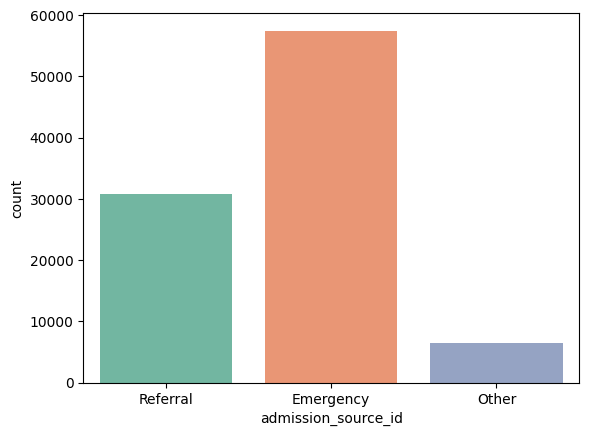

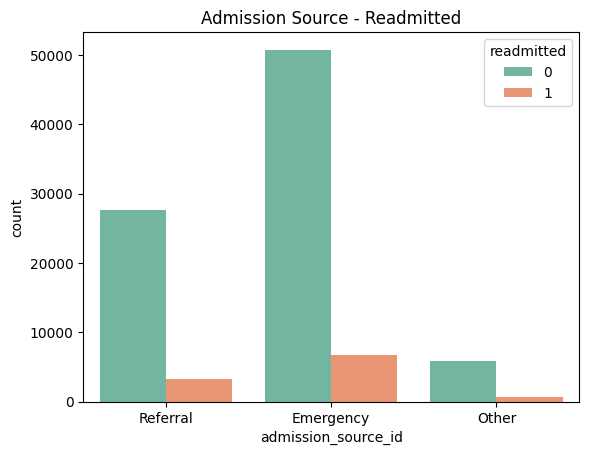

In [79]:
# Reemplazar los valores en 'admission_source_id' según el diccionario 'mapped_adm'
mapped_adm = {
    1: "Referral", 2: "Referral", 3: "Referral", 4: "Other", 5: "Other", 6: "Other", 
    10: "Other", 22: "Other", 25: "Other", 9: "Other", 8: "Other", 14: "Other", 
    13: "Other", 11: "Other", 15: np.nan, 17: np.nan, 20: np.nan, 21: np.nan, 7: "Emergency"
}
df.admission_source_id = df.admission_source_id.replace(mapped_adm)

# Imprimir la distribución de 'admission_source_id'
print(df.admission_source_id.value_counts())

# Graficar la distribución de 'admission_source_id'
sns.countplot(x="admission_source_id", data=df, palette="Set2")
plt.show()

# Graficar la distribución de 'admission_source_id' diferenciada por 'readmitted'
sns.countplot(x="admission_source_id", hue="readmitted", data=df, palette="Set2")
plt.title("Admission Source - Readmitted")
plt.show()


time_in_hospital
3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\2714881806.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="time_in_hospital", data=df, palette="Set2",


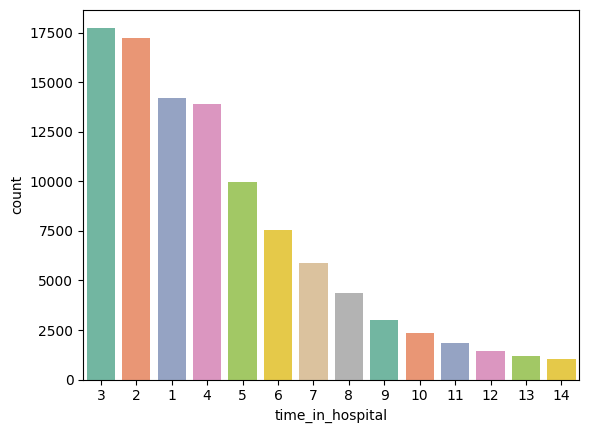

In [80]:
# Imprimir la distribución de 'time_in_hospital'
print(df.time_in_hospital.value_counts())

# Graficar la distribución de 'time_in_hospital'
sns.countplot(x="time_in_hospital", data=df, palette="Set2",
              order=df.time_in_hospital.value_counts().index)
plt.show()

## **Conjunto de datos y Entrenamiento del modelo**

In [81]:
# Rellenar valores nulos con el valor más frecuente (modo) para varias columnas
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['admission_type_id'].fillna(df['admission_type_id'].mode()[0], inplace=True)
df['discharge_disposition_id'].fillna(df['discharge_disposition_id'].mode()[0], inplace=True)
df['admission_source_id'].fillna(df['admission_source_id'].mode()[0], inplace=True)

C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\3681408726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)
C:\Users\ricar\AppData\Local\Temp\ipykernel_4692\3681408726.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [82]:
# Seleccionar columnas categóricas y numéricas
cat_data = df.select_dtypes('O')  # Datos categóricos
num_data = df.select_dtypes(np.number)  # Datos numéricos
cat_data  # Mostrar las columnas categóricas

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Emergency,Discharged to Home,Referral,250.83,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to Home,Emergency,276,250.01,255,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,Emergency,Discharged to Home,Emergency,648,250,V27,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to Home,Emergency,8,250.43,403,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,Emergency,Discharged to Home,Emergency,197,157,250,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Other,Emergency,250.13,291,458,NaN,>8,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,Emergency,Other,Other,560,276,787,NaN,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to Home,Emergency,38,590,296,NaN,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,Emergency,Other,Emergency,996,285,998,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [83]:
# Crear el codificador LabelEncoder
LE = LabelEncoder()

# Codificar las columnas categóricas
cat_data = cat_data.apply(LE.fit_transform)

In [84]:
# Concatenar datos numéricos y categóricos
data = pd.concat([num_data, cat_data], axis=1)

# Ver las primeras filas
data.head()

# Ver los valores únicos de la columna 'glipizide'
data['glipizide'].unique()

array([1, 2, 3, 0])

In [85]:
# Eliminar las columnas 'encounter_id' y 'patient_nbr'
data.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

# Ver las primeras filas del DataFrame resultante
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,5,1,41,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,3,1,0,0,0,0,0,1
2,25,2,11,5,13,2,0,1,6,0,...,0,0,1,1,0,0,0,0,1,1
3,35,2,44,1,16,0,0,0,7,0,...,0,0,3,1,0,0,0,0,0,1
4,45,1,51,0,8,0,0,0,5,0,...,0,0,2,1,0,0,0,0,0,1


In [86]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop('readmitted', axis=1)
y = data['readmitted']

In [87]:
# Dividir los datos en conjunto de entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [88]:
# Escalar los datos utilizando StandardScaler
SC = StandardScaler()
X_train_scaled = pd.DataFrame(SC.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(SC.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test), columns=X_test.columns)

In [89]:
# Crear y entrenar el modelo RandomForestClassifier
modelo_rf = RandomForestClassifier()

# Entrenar el modelo con los datos de entrenamiento escalados
modelo_rf.fit(X_train_scaled, y_train)

# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
modelo_rf.score(X_train_scaled, y_train)

1.0

## **Evaluación del Modelo**

In [90]:
# Evaluar el rendimiento del modelo en los conjuntos de validación y prueba
score_val = modelo_rf.score(X_val_scaled, y_val)
score_test = modelo_rf.score(X_test_scaled, y_test)

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo_rf.predict(X_test_scaled)

# Calcular la matriz de confusión y la precisión
matriz_confusion = confusion_matrix(y_test, y_pred)
precisión = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print(f"Precisión en el conjunto de validación: {score_val}")
print(f"Precisión en el conjunto de prueba: {score_test}")
print(f"Matriz de confusión:\n{matriz_confusion}")
print(f"Precisión del modelo: {precisión}")

Precisión en el conjunto de validación: 0.887176022601646
Precisión en el conjunto de prueba: 0.8886650616616715
Matriz de confusión:
[[18074    10]
 [ 2256    13]]
Precisión del modelo: 0.8886650616616715
